In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

# For wgs84 projections
from pyproj import Transformer
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({
        'font.size': 18,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
#%matplotlib inline

# Constants used by paparazzi
intFracSpeed = 19
intFracAccel = 10
intFracPos = 8

In [2]:
# Function to draw a SuperEllipse (p-norm)
def afSuperEllipse(fPIndex, fRadius, afCenter):
    fEps = 10**(-6)
    afParam = np.linspace(0, 4*np.pi - fEps, 100)
    afX = np.abs(np.cos(afParam))**(2 / fPIndex) * fRadius * np.sign(np.cos(afParam))
    afY = np.abs(np.sin(afParam))**(2 / fPIndex) * fRadius * np.sign(np.sin(afParam))
    return afX + afCenter[0], afY + afCenter[1]

In [12]:
# Global variable for saving or not a figure
intSaveFig = 1

# Data representation for the main article

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


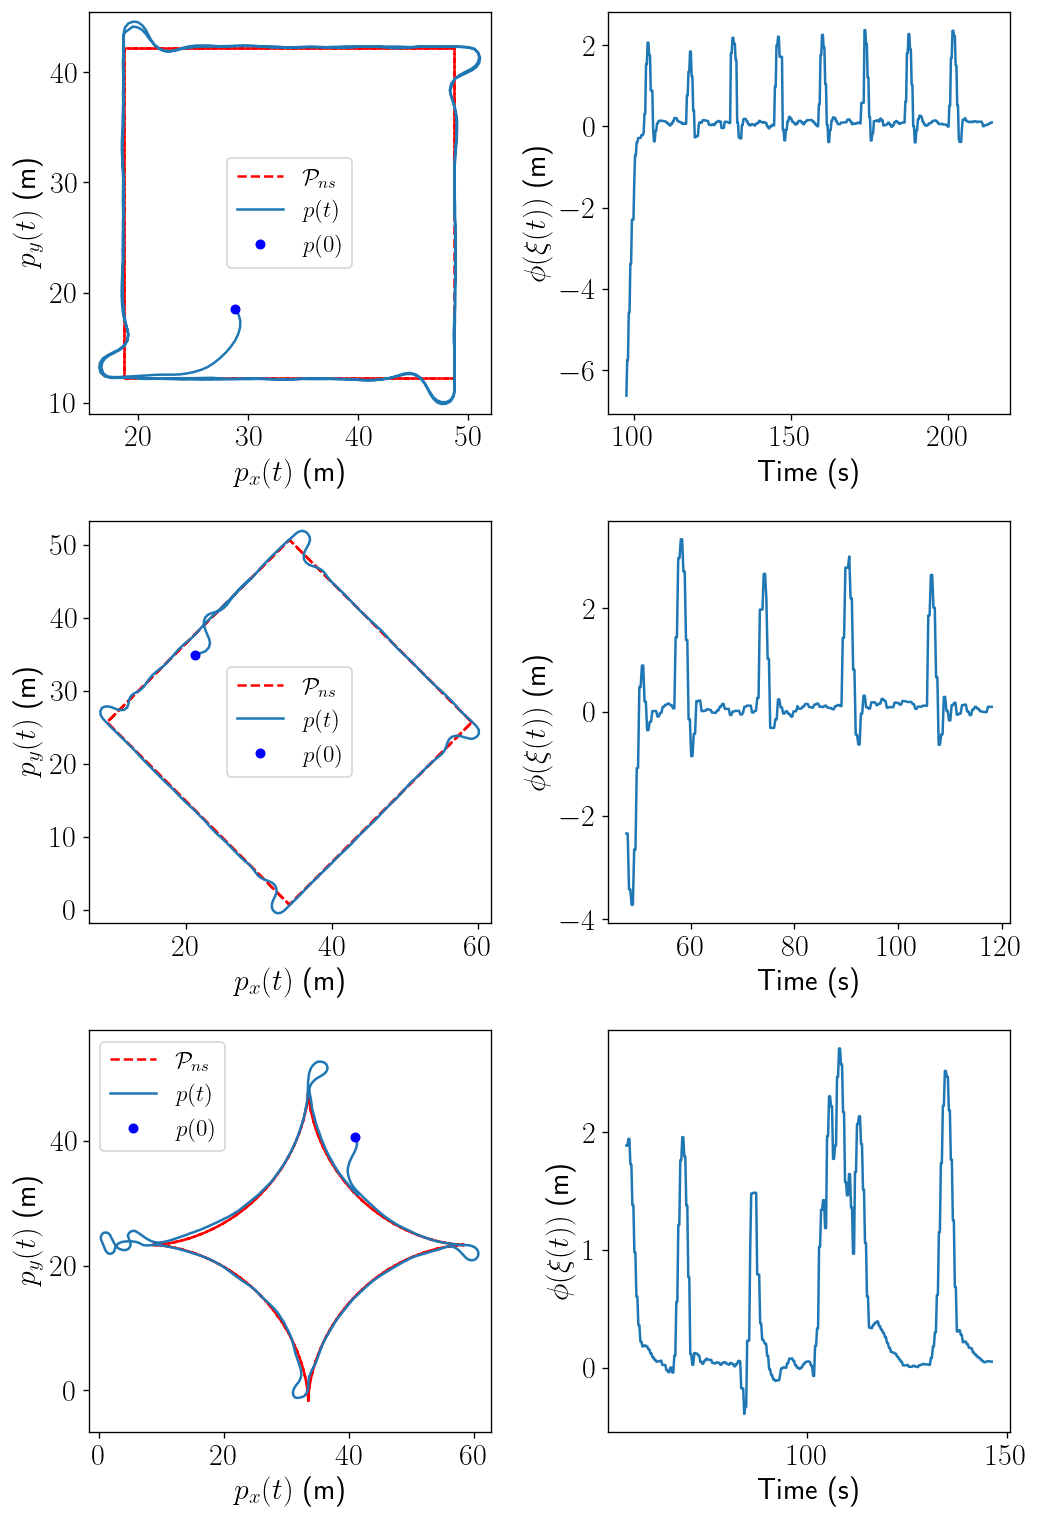

In [ ]:
tbSqr = pd.read_table(r"25_02_25__10_01_21:5.csv")
tbRmb = pd.read_table(r"25_02_25__10_04_59:5.csv")
tbPNorm = pd.read_table(r"25_02_25__10_07_01:5.csv")

# Get Time array
afSqrTime = np.array(tbSqr['Time'])
afRmbTime = np.array(tbRmb['Time'])
afPNormTime = np.array(tbPNorm['Time'])

# Get Position array. In Paparazzi axes are inverted (IMU)
afSqrPosX = np.array(tbSqr['INS:ins_y']) / (1 << intFracPos)
afSqrPosY = np.array(tbSqr['INS:ins_x']) / (1 << intFracPos)
afRmbPosX = np.array(tbRmb['INS:ins_y']) / (1 << intFracPos)
afRmbPosY = np.array(tbRmb['INS:ins_x']) / (1 << intFracPos)
afPNormPosX = np.array(tbPNorm['INS:ins_y']) / (1 << intFracPos)
afPNormPosY = np.array(tbPNorm['INS:ins_x']) / (1 << intFracPos)

# Get Errors to path
afSqrPhi = np.array(tbSqr['GVF:error'])
afRmbPhi = np.array(tbRmb['GVF:error'])
afPNormPhi = np.array(tbPNorm['GVF:error'])

# Get Position of Square, Romboid and P Norm
afSqrSqrPos = np.array(tbSqr['GVF:p'])
afRmbRmbPos = np.array(tbRmb['GVF:p'])
afPNormPNormPos = np.array(tbPNorm['GVF:p'])

# Get last position of the center of the Square, Romboid and PNorm
afSqrSqrPos = np.fromstring(afSqrSqrPos[-1], count=3, sep=',')
afRmbRmbPos = np.fromstring(afRmbRmbPos[-1], count=3, sep=',')
afPNormPNormPos = np.fromstring(afPNormPNormPos[500], count=4, sep=',')

# Get arrays to draw the square, rhomboid and pnorm
afSqrDrawX, afSqrDrawY = afSuperEllipse(np.inf, afSqrSqrPos[2], afSqrSqrPos[0:2])
afRmbDrawX, afRmbDrawY = afSuperEllipse(1, afRmbRmbPos[2], afRmbRmbPos[0:2])
afPNormDrawX, afPNormDrawY = afSuperEllipse(afPNormPNormPos[3], afPNormPNormPos[2], 
                                            afPNormPNormPos[0:2])

# Ad-hoc drawing indexes (in order to draw the interesting experiment times)
afSqrIndx = [310, -10]
afRmbIndx = [170, -10]
afPNormIndx = [190, -450]

plt.figure(figsize=(9,13))
# Square
plt.subplot(321)
#plt.plot(afSqrSqrPos[0], afSqrSqrPos[1], 'k.', markersize=10)
plt.plot(afSqrDrawX, afSqrDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afSqrPosX[afSqrIndx[0]:afSqrIndx[1]], afSqrPosY[afSqrIndx[0]:afSqrIndx[1]], 
         label=r"$p(t)$")
plt.plot(afSqrPosX[afSqrIndx[0]], afSqrPosY[afSqrIndx[0]], 'b.', markersize=10, 
         label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')

# Rhomboid
plt.subplot(323)
#plt.plot(afRmbRmbPos[0], afRmbRmbPos[1], 'k.', markersize=10)
plt.plot(afRmbDrawX, afRmbDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afRmbPosX[afRmbIndx[0]:afRmbIndx[1]], afRmbPosY[afRmbIndx[0]:afRmbIndx[1]], 
         label=r"$p(t)$")
plt.plot(afRmbPosX[afRmbIndx[0]], afRmbPosY[afRmbIndx[0]], 'b.', markersize=10, 
         label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')

# PNorm
plt.subplot(325)
#plt.plot(afPNormPNormPos[0], afPNormPNormPos[1], 'k.', markersize=10)
plt.plot(afPNormDrawX, afPNormDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afPNormPosX[afPNormIndx[0]:afPNormIndx[1]], afPNormPosY[afPNormIndx[0]:afPNormIndx[1]], 
         label=r"$p(t)$")
plt.plot(afPNormPosX[afPNormIndx[0]], afPNormPosY[afPNormIndx[0]], 'b.', markersize=10, 
         label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')
plt.tight_layout()

plt.subplot(322)
plt.plot(afSqrTime[afSqrIndx[0]:afSqrIndx[1]], afSqrPhi[afSqrIndx[0]:afSqrIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$ (m)")

plt.subplot(324)
plt.plot(afRmbTime[afRmbIndx[0]:afRmbIndx[1]], afRmbPhi[afRmbIndx[0]:afRmbIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$ (m)")

plt.subplot(326)
plt.plot(afPNormTime[afPNormIndx[0]:afPNormIndx[1]], afPNormPhi[afPNormIndx[0]:afPNormIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$ (m)")

plt.tight_layout()


if(intSaveFig):
    plt.savefig("Figures/TrajExperimentV2.eps", format="eps")

# Data representation for the auxiliary article

In [ ]:
# HOMES ARE IN INS_REF!!!! (IN LON, LAT. But the projection is WSG84. Consider 
# one robot to have the origin and shift the other and that's it.)

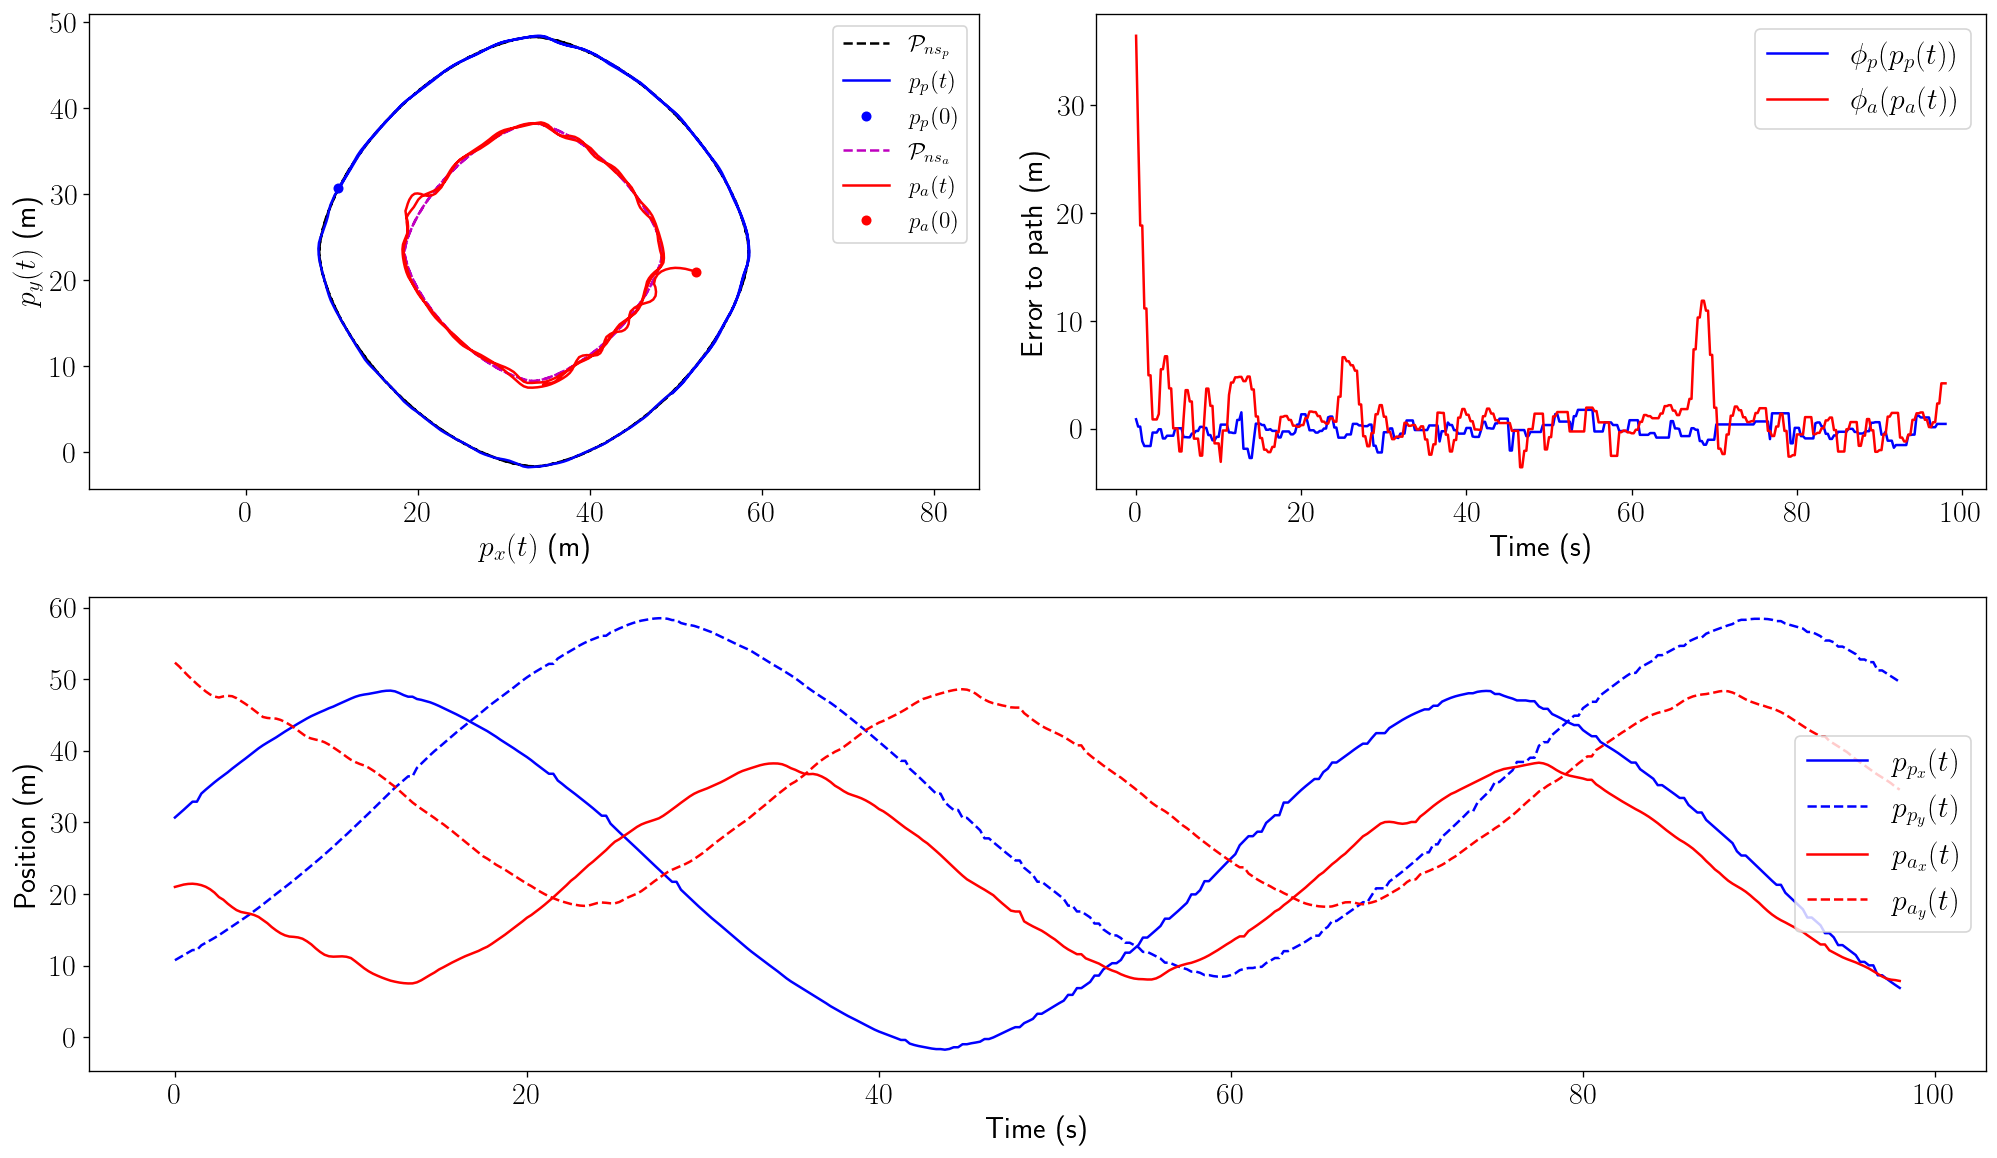

In [ ]:
tbPepa = pd.read_table(r"25_02_25__10_15_14:PEPA.csv")
tbAnib = pd.read_table(r"25_02_25__10_15_14:ANIBAL.csv")

# Constant factor used by Paparazzi
fLATHOMEFACTOR = 0.0000001;

afPepaHomelat0 = np.array(tbPepa['INS_REF:lat0']) * fLATHOMEFACTOR
afPepaHomelon0 = np.array(tbPepa['INS_REF:lon0']) * fLATHOMEFACTOR
afAnibHomelat0 = np.array(tbAnib['INS_REF:lat0']) * fLATHOMEFACTOR
afAnibHomelon0 = np.array(tbAnib['INS_REF:lon0']) * fLATHOMEFACTOR

# Define WGS84 (latitude/longitude) and UTM Zone 30N (Madrid)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32630", always_xy=True)

# Convert to UTM (meters)
afAnibHomeUTMX, afAnibHomeUTMY = transformer.transform(afAnibHomelon0, afAnibHomelat0)
afPepaHomeUTMX, afPepaHomeUTMY = transformer.transform(afPepaHomelon0, afPepaHomelat0)

# Get Anib offset w.r.t Pepa's. Pepa is considered as HOME for every other robot
fAnibXOffset = afAnibHomeUTMX[0] - afPepaHomeUTMX[0]
fAnibYOffset = afAnibHomeUTMY[0] - afPepaHomeUTMY[0]
afAnibPosOffset = np.array([fAnibXOffset, fAnibYOffset])

# Get Time array
afPepaTime = np.array(tbPepa['Time'])
afAnibTime = np.array(tbAnib['Time'])
#afPNormTime = np.array(tbPNorm['Time'])

# Get Position array. In Paparazzi axes are inverted (IMU)
afPepaPosX = np.array(tbPepa['INS:ins_y']) / (1 << intFracPos)
afPepaPosY = np.array(tbPepa['INS:ins_x']) / (1 << intFracPos)
afAnibPosX = np.array(tbAnib['INS:ins_y']) / (1 << intFracPos) + afAnibPosOffset[0]
afAnibPosY = np.array(tbAnib['INS:ins_x']) / (1 << intFracPos) + afAnibPosOffset[1]

# Get Errors to path
afPepaPhi = np.array(tbPepa['GVF:error'])
afAnibPhi = np.array(tbAnib['GVF:error'])

# Get Position of Square, Romboid and P Norm
afPepaPepaPos = np.array(tbPepa['GVF:p'])
afAnibAnibPos = np.array(tbAnib['GVF:p'])

# Get last position of the center of the Square, Romboid and PNorm
afPepaPepaPos = np.fromstring(afPepaPepaPos[-1], count=4, sep=',')
afAnibAnibPos = np.fromstring(afAnibAnibPos[-1], count=4, sep=',')


# Get arrays to draw the square, rhomboid and pnorm
afPepaDrawX, afPepaDrawY = afSuperEllipse(afPepaPepaPos[3], afPepaPepaPos[2], 
                                          afPepaPepaPos[0:2])
afAnibDrawX, afAnibDrawY = afSuperEllipse(afAnibAnibPos[3], afAnibAnibPos[2], 
                                          afAnibAnibPos[0:2] + afAnibPosOffset)

# Ad-hoc drawing indexes (in order to draw the interesting experiment times)
afPepaIndx = [407, 800]
afAnibIndx = [407, 800]

plt.figure(figsize=(17,10))

############################## Position plot ##################################
# Pepa's Position
plt.subplot(2,2,1)
plt.plot(afPepaDrawX, afPepaDrawY, 'k--', label=r"$\mathcal P_{{ns}_p}$")
plt.plot(afPepaPosX[afPepaIndx[0]:afPepaIndx[1]], afPepaPosY[afPepaIndx[0]:afPepaIndx[1]], 
         'b', label=r"$p_{p}(t)$")
plt.plot(afPepaPosX[afPepaIndx[0]], afPepaPosY[afPepaIndx[0]], 'b.', 
         markersize=10, label=r"$p_{p}(0)$")
# Anibal's Position
plt.plot(afAnibDrawX, afAnibDrawY, 'm--', label=r"$\mathcal P_{{ns}_a}$")
plt.plot(afAnibPosX[afAnibIndx[0]:afAnibIndx[1]], afAnibPosY[afAnibIndx[0]:afAnibIndx[1]], 
         'r',  label=r"$p_{a}(t)$")
plt.plot(afAnibPosX[afAnibIndx[0]], afAnibPosY[afAnibIndx[0]], 
         'r.', markersize=10, label=r"$p_{a}(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')


############################## Position in x-y plot ############################
plt.subplot(2,1,2)
plt.plot(afPepaTime[afPepaIndx[0]:afPepaIndx[1]] - afPepaTime[afPepaIndx[0]], 
         afPepaPosY[afPepaIndx[0]:afPepaIndx[1]], 'b', label=r"$p_{p_x}(t)$")
plt.plot(afPepaTime[afPepaIndx[0]:afPepaIndx[1]] - afPepaTime[afPepaIndx[0]], 
         afPepaPosX[afPepaIndx[0]:afPepaIndx[1]], 'b--', label=r"$p_{p_y}(t)$")
plt.plot(afAnibTime[afAnibIndx[0]:afAnibIndx[1]] - afAnibTime[afAnibIndx[0]], 
         afAnibPosY[afAnibIndx[0]:afAnibIndx[1]], 'r', label=r"$p_{a_x}(t)$")
plt.plot(afAnibTime[afAnibIndx[0]:afAnibIndx[1]] - afAnibTime[afAnibIndx[0]], 
         afAnibPosX[afAnibIndx[0]:afAnibIndx[1]], 'r--', label=r"$p_{a_y}(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()


############################## Error to path plot ##############################
plt.subplot(2,2,2)
# The problem to draw the lines is that they do not have the same home!
plt.plot(afPepaTime[afPepaIndx[0]:afPepaIndx[1]] - afPepaTime[afPepaIndx[0]], 
         afPepaPhi[afPepaIndx[0]:afPepaIndx[1]], 'b', label=r"$\phi_p(p_p(t))$")
plt.plot(afAnibTime[afAnibIndx[0]:afAnibIndx[1]] - afAnibTime[afAnibIndx[0]], 
         afAnibPhi[afAnibIndx[0]:afAnibIndx[1]], 'r', label=r"$\phi_a(p_a(t))$")
plt.legend()
plt.xlabel(r"Time (s)")
plt.ylabel("Error to path (m)")
plt.tight_layout()